# CC3001 Otoño 2022 Tarea 5 [Escriba su nombre aquí]

## ABB+

### Profesores
Sección 1 Iván Sipirán •
Sección 2 Patricio Poblete •
Sección 3 Nelson Baloian



In [ ]:
!pip install aed-utilities

import aed_utilities as aed
import numpy as np

## Introducción

Un *árbol de búsqueda binaria+* (*ABB+*) es un ABB modificado para que las $n$ llaves que están almacenadas en los nodos internos aparezcan además en las hojas, en orden ascendente,de izquierda a derecha. La última hoja de la derecha tiene una llave especial ``inf``("$+\infty$"), como se ve en el siguiente ejemplo:

![Ejemplo ABB+](https://drive.google.com/uc?export=view&id=1-SAU_CJ_nHd63KgOpZAUO1-AiiHlvu6g)

Para buscar una llave $x$ en este árbol, comenzamos en la raíz y vamos preguntando si $x$ es $\le$ que la llave de ese nodo. Si la respuesta es que sí, bajamos hacia la izquierda; si no, bajamos hacia la derecha. Al llegar finalmente a una hoja, ahí se compara por igualdad para ver si la llave buscada está ahí o no.

En comparación con un ABB, el correspondiente ABB+ hace búsquedas más eficientes, porque hace solo una pregunta por nodo, en lugar de las dos que se hacen en el ABB (primero preguntando por igualdad y luego por menor o mayor).

Nótese que un ABB+ vacío (cero llaves) consiste de una sola hoja con ``inf``en su interior.

## Objetivo de la tarea

Su trabajo consiste en implementar las clases ``Arbol``, ``Nodoi`` y ``Nodoe`` y los métodos ``insert`` y ``search`` en todos lugares en donde corresponda (no se pide implementar ``delete``). Luego debe ejecutar los casos de prueba que se indica.

Esta tarea se puede resolver con recursividad o sin recursividad. Usted debe decidir cuál enfoque usar.

En el código que aparece a continuación usted debe agregar todo lo necesario para que la implementación esté completa.

In [3]:
class Nodoi:
    def __init__(self, izq, info, der):
        self.izq=izq
        self.info=info
        self.der=der
        
    def search(self,x):
        if x == self.info: 
            return self
        if x < self.info: 
            return self.izq.search(x)
        else:            
            return self.der.search(x)
        
    def insert(self,x):             
        if x < self.info:
            return Nodoi(self.izq.insert(x),self.info,self.der)
        elif x == self.info:
            return Nodoi
        else:
            return Nodoi(self.izq,self.info,self.der.insert(x))

class Nodoe:
    def __init__(self,info):
        self.info=info
    
    def search(self,x):
        if x == self.info: 
            return self
        else: 
            return None
        
    def insert(self,x):
        if self.info == np.inf:
            return Nodoi(Nodoe(x), x, Nodoe(np.inf)) # Asi se maneja el inf para que no de problemas
        if x <= self.info: # Se inserta en la izquierda
            return Nodoi(Nodoe(x), x, Nodoe(self.info))
        else: # Se inserta en la derecha
            return Nodoi(Nodoe(self.info), x, Nodoe(x))
    

class Arbol:
    def __init__(self,raiz=Nodoe(np.inf)):
        self.raiz=raiz
    
    def search(self,x):
        return self.raiz.search(x)
    
    def insert(self,x):
        self.raiz = self.raiz.insert(x)
        
    
    
    def dibujar(self):
      btd = aed.BinaryTreeDrawer(fieldData="info", fieldLeft="izq", fieldRight="der", classNone=Nodoe)
      btd.draw_tree(self, "raiz")
      

La siguiente función es útil para probar su implementación:

In [4]:
def test(a,x):
    print(x, "está" if a.search(x) is not None else "no está")

## Prueba 1: Construir un árbol por inserciones sucesivas

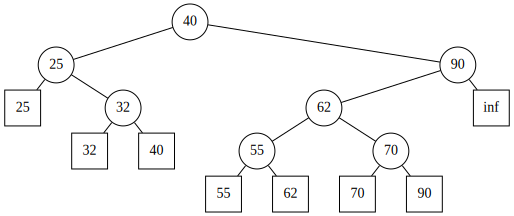

62 está
95 no está


In [7]:
a=Arbol()
a.insert(40)
a.insert(25)
a.insert(32)
a.insert(90)
a.insert(62)
a.insert(55)
a.insert(70)
a.dibujar()
test(a,62)
test(a,95)

## Prueba 2: Agregar una llave que no estaba y buscarla

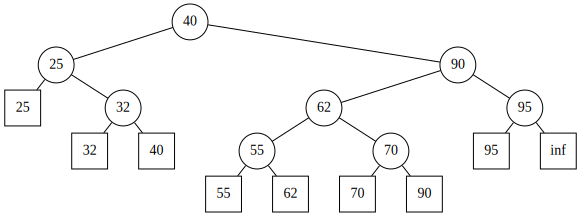

95 está


In [6]:
a.insert(95)
a.dibujar()
test(a,95)

## ¿Qué hay que entregar?

Usted debe crear una copia de este documento (del menú seleccionar "Archivo" o "File" y de ahi la opción "guardar copia en Drive" o "save a copy in Drive"). Este nuevo documento (notebook de Colab) es el que debe modificar para luego compartirlo con la opción "Cualquier usuario de internet con este enlace puede ver esto" (o “Anyone on the internet with this link can view”). Esta opción se encuentra disponible en la parte superior derecha de su notebook, en el botón "Compartir" (o "Share"). Una vez que tenga disponible el enlace, colocarlo en la descripción de la entrega de su tarea. No olvide colocar su nombre dentro del notebook.